In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [288]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [27]:
def plot(labels, km_add, km_cat, gmm_add, gmm_cat, em):
    plt.figure(figsize=(20,5))
    #plt.plot(km_add, '-go', label="K-Means (Add)")
    #plt.plot(km_cat, '--r', label="K-Means (Cat)")
    #plt.plot(gmm_add, '-ys', label="GMM (Add)")
    #plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
    df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
    df.reset_index()
    sns.set_style("ticks", {'axes.grid' : True})
    colors = ['#D68835', '#455E85', '#CF298F', '#366638']
    sns.lineplot(data=df, palette=colors, markers=True, markersize=11)
    #plt.title("Experimental Results: " + 
    #          (em.title() if em == 'purity' else em.upper()) + " Data " +
    #          ("R" if num == '34' else "C" + num), fontsize=30)
    plt.legend(loc="best")
    #plt.xlabel('Data', fontsize=30)
    plt.ylabel(em.upper())
    #plt.xticks(rotation=90, fontsize=15)
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
    #plt.yticks(fontsize=15)
    #plt.ylim([0.1, 0.7])
    #plt.grid()
    #plt.savefig(("plot_result/Experimental_Results_" + 
    #          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
    #          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [28]:
def make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em):
    df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
    if c_num == '23':
        if em == 'ari':
            df_ari_23 = df.copy(deep=True)
        elif em == 'nmi':
            df_nmi_23 = df.copy(deep=True)
        elif em == 'purity':
            df_purity_23 = df.copy(deep=True)
    elif c_num == '34':
        if em == 'ari':
            df_ari_34 = df.copy(deep=True)
        elif em == 'nmi':
            df_nmi_34 = df.copy(deep=True)
        elif em == 'purity':
            df_purity_34 = df.copy(deep=True)

In [172]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]


In [173]:
for c_num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob('./csv_' + c_num + '/' + em + '/*'):
            if "add" in file:
                add.append(file)
            elif "cat" in file:
                cat.append(file)
            else:
                uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        labels_x = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 're' in csvFile:
                labels.append("Real")
                labels_x.append('Real')
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
                labels_x.append('seq2seq')
            elif 'se' in csvFile:
                labels.append("Semantic")
                labels_x.append('Semantic')
            elif 'rico' in csvFile:
                labels.append("Rico")
                labels_x.append('Rico')
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                km_cat.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))
                gmm_cat.append(float(res.split(',')[0]))


        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("Rico & seq2seq " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & seq2seq " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("Rico & seq2seq")
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("Rico & Real " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("Rico & Real Activity Image")
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("Rico & Semantic " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("Rico & Semantic Activity Image")
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("seq2seq & Real " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("seq2seq & Real Activity Image")
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            #labels.append("seq2seq & Semantic " + w)
                            #is_w = True
                            #break
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                        #labels.append("seq2seq & Semantic Activity Image")
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        #labels.append("Real & Semantic " + w)
                        #is_w = True
                        #break
                        labels_x.append(w)
                        if w == "0.1":
                            labels.append("Real & Semantic " + w)
                            is_w = True
                            break
                        else:
                            labels.append(w)
                            is_w = True
                            break
                if not is_w:
                    continue
                    #labels.append("Real & Semantic Activity Image")
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_cat.append(float(res.split(',')[-1]))
                gmm_cat.append(float(res.split(',')[0]))
                
        #make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em)
        #plot(labels, km_add, km_cat, gmm_add, gmm_cat, em)
        df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
        if c_num == '23':
            if em == 'ari':
                df_ari_23 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_23 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_23 = df.copy(deep=True)
        elif c_num == '34':
            if em == 'ari':
                df_ari_34 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_34 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_34 = df.copy(deep=True)

In [174]:
df_ari_23.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
0,0.175,0.175,0.167,0.167
1,0.325,0.325,0.324,0.324
2,0.199,0.199,0.212,0.212
3,0.290,0.290,0.278,0.278
4,0.336,0.337,0.336,0.331


In [175]:
for k, i in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    print(k, i[0], i[1])

0 37 0.337
1 36 0.343
2 4 0.336
3 37 0.349


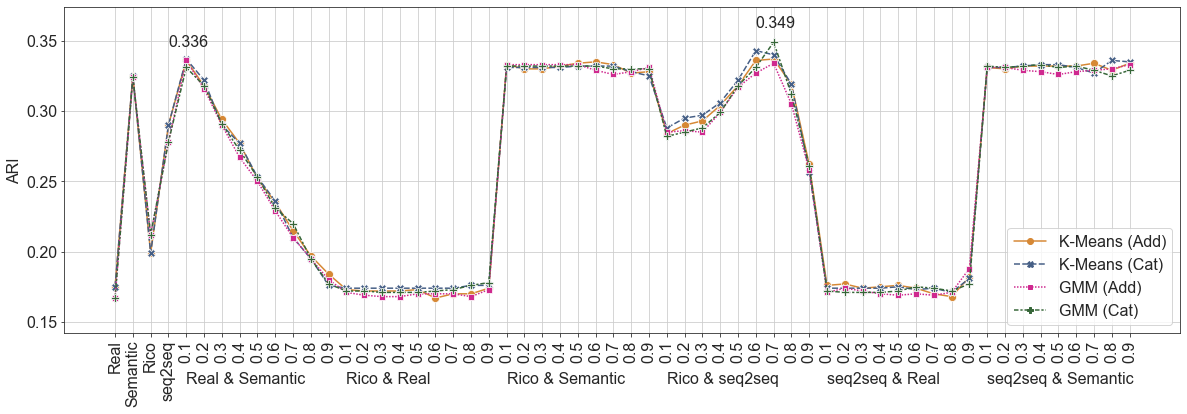

In [367]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_23.min().min()-0.025, df_ari_23.max().max()+0.025])
plt.text(4, 0.106, 'Real & Semantic')
plt.text(13, 0.106, 'Rico & Real')
plt.text(22, 0.106, 'Rico & Semantic')
plt.text(31, 0.106, 'Rico & seq2seq')
plt.text(40, 0.106, 'seq2seq & Real')
plt.text(49, 0.106, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    if i==2 or i==3:
        plt.text(j[0]-1, j[1]+0.01, str(j[1]))
plt.savefig('plot_ari_23.png', format='png', bbox_inches='tight', transparent=True)
#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [177]:
for k, i in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    print(k, i[0], i[1])

0 57 0.604
1 4 0.604
2 57 0.6
3 4 0.599


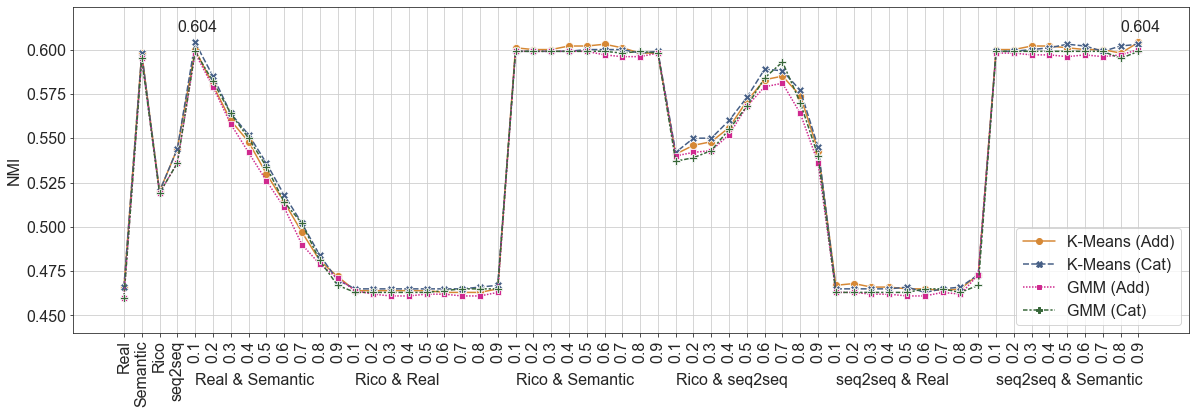

In [370]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_23.min().min()-0.02, df_nmi_23.max().max()+0.02])
plt.text(4, 0.411, 'Real & Semantic')
plt.text(13, 0.411, 'Rico & Real')
plt.text(22, 0.411, 'Rico & Semantic')
plt.text(31, 0.411, 'Rico & seq2seq')
plt.text(40, 0.411, 'seq2seq & Real')
plt.text(49, 0.411, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    if i==0 or i==1:
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('plot_nmi_23.png', format='png', bbox_inches='tight', transparent=True)
#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [179]:
for k, i in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    print(k, i[0], i[1])

0 55 0.429
1 36 0.434
2 49 0.43
3 26 0.427


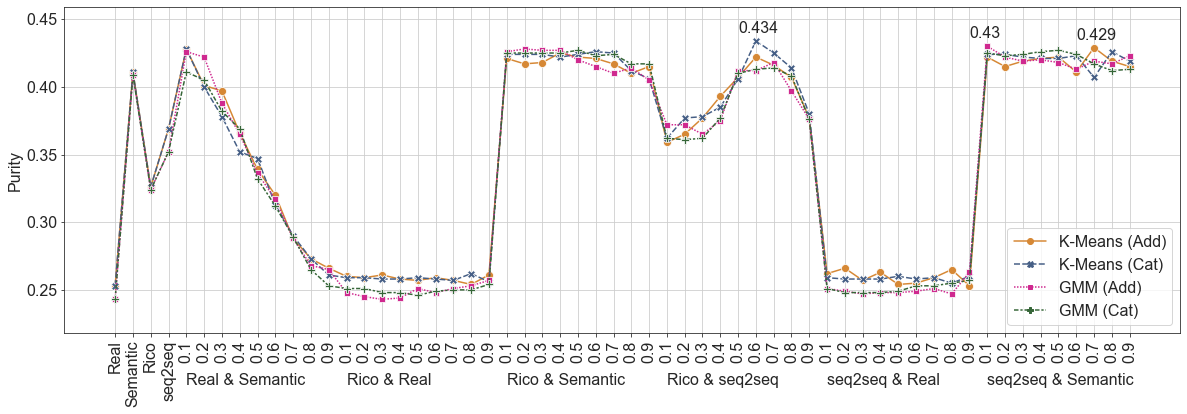

In [372]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_23.min().min()-0.025, df_purity_23.max().max()+0.025])
plt.text(4, 0.18, 'Real & Semantic')
plt.text(13, 0.18, 'Rico & Real')
plt.text(22, 0.18, 'Rico & Semantic')
plt.text(31, 0.18, 'Rico & seq2seq')
plt.text(40, 0.18, 'seq2seq & Real')
plt.text(49, 0.18, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    if i != 3: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('plot_purity_23.png', format='png', bbox_inches='tight', transparent=True)
#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [76]:
for k, i in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    print(k, i[0], i[1])

0 37 0.373
1 37 0.383
2 37 0.361
3 37 0.375


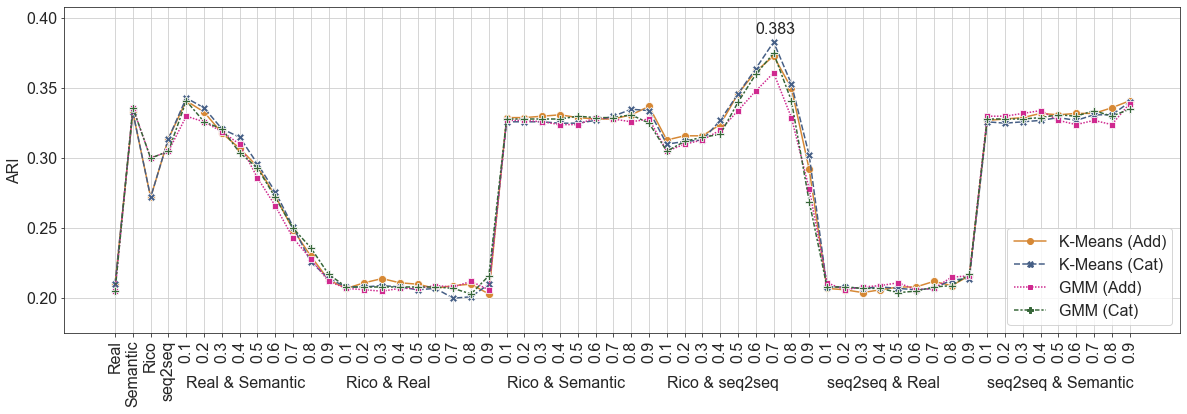

In [378]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="lower right")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_34.min().min()-0.025, df_ari_34.max().max()+0.025])
plt.text(4, 0.136, 'Real & Semantic')
plt.text(13, 0.136, 'Rico & Real')
plt.text(22, 0.136, 'Rico & Semantic')
plt.text(31, 0.136, 'Rico & seq2seq')
plt.text(40, 0.136, 'seq2seq & Real')
plt.text(49, 0.136, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('plot_ari_34.png', format='png', bbox_inches='tight', transparent=True)
#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [82]:
for k, i in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    print(k, i[0], i[1])

0 57 0.63
1 4 0.631
2 57 0.627
3 1 0.626


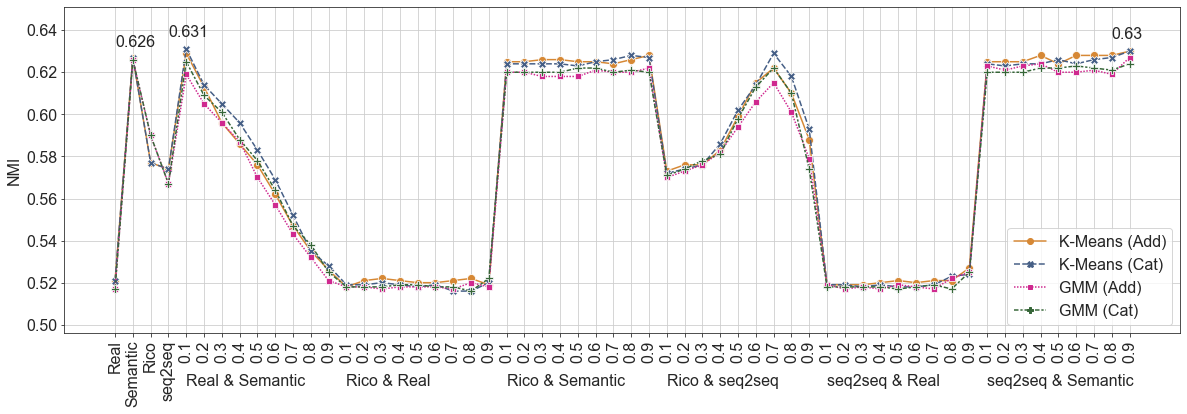

In [382]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_34.min().min()-0.02, df_nmi_34.max().max()+0.02])
plt.text(4, 0.471, 'Real & Semantic')
plt.text(13, 0.471, 'Rico & Real')
plt.text(22, 0.471, 'Rico & Semantic')
plt.text(31, 0.471, 'Rico & seq2seq')
plt.text(40, 0.471, 'seq2seq & Real')
plt.text(49, 0.471, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    if i != 2: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('plot_nmi_34.png', format='png', bbox_inches='tight', transparent=True)
#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [85]:
for k, i in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    print(k, i[0], i[1])

0 37 0.495
1 37 0.501
2 37 0.476
3 37 0.493


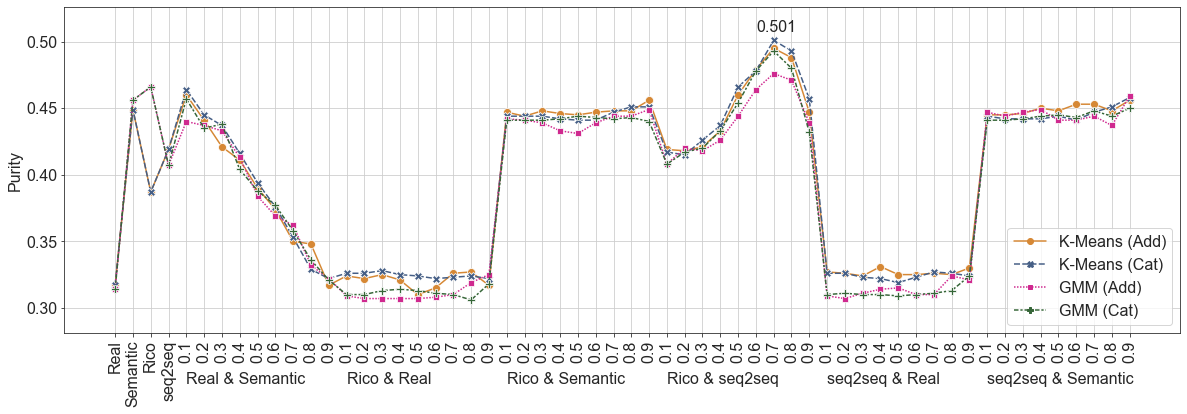

In [385]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_34.min().min()-0.025, df_purity_34.max().max()+0.025])
plt.text(4, 0.243, 'Real & Semantic')
plt.text(13, 0.243, 'Rico & Real')
plt.text(22, 0.243, 'Rico & Semantic')
plt.text(31, 0.243, 'Rico & seq2seq')
plt.text(40, 0.243, 'seq2seq & Real')
plt.text(49, 0.243, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('plot_purity_34.png', format='png', bbox_inches='tight', transparent=True)
#plt.savefig(("plot_result/Experimental_Results_" + 
#          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
#          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [181]:
df_ari_23[0:4]['GMM (Add)']

0    0.167
1    0.324
2    0.212
3    0.278
Name: GMM (Add), dtype: float64

In [339]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq']
df_23 = pd.DataFrame([df_ari_23[0:4]['GMM (Add)'], df_ari_23[0:4]['K-Means (Add)'], df_nmi_23[0:4]['GMM (Add)'], df_nmi_23[0:4]['K-Means (Add)'], df_purity_23[0:4]['GMM (Add)'], df_purity_23[0:4]['K-Means (Add)']])
df_23.columns = column_names
df_23 = df_23.T
df_23.columns = row_names
df_23['type'] = column_names
df_23 = pd.melt(df_23, id_vars="type", var_name="eval", value_name="eval_values")

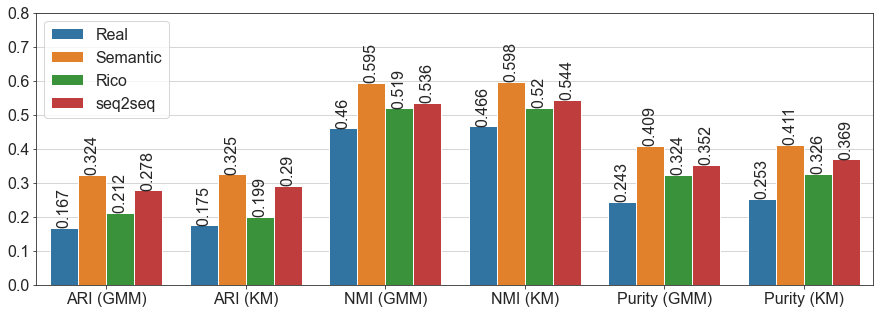

In [349]:
plt.figure(figsize=(15,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('plot_single_23.png', format='png', bbox_inches='tight', transparent=True)

In [340]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq']
df_34 = pd.DataFrame([df_ari_34[0:4]['GMM (Add)'], df_ari_34[0:4]['K-Means (Add)'], df_nmi_34[0:4]['GMM (Add)'], df_nmi_34[0:4]['K-Means (Add)'], df_purity_34[0:4]['GMM (Add)'], df_purity_34[0:4]['K-Means (Add)']])
df_34.columns = column_names
df_34 = df_34.T
df_34.columns = row_names
df_34['type'] = column_names
df_34 = pd.melt(df_34, id_vars="type", var_name="eval", value_name="eval_values")

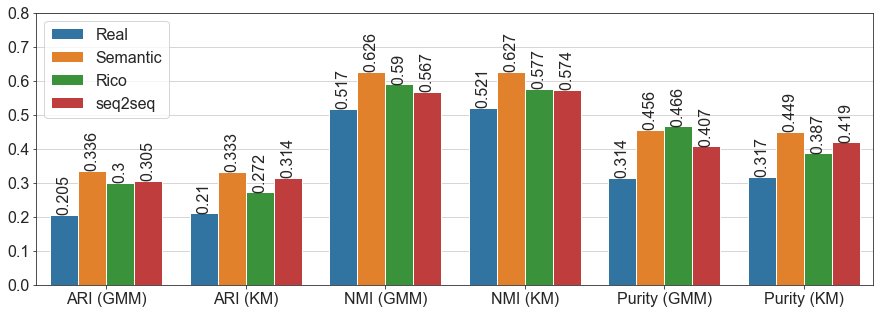

In [347]:
plt.figure(figsize=(15,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('plot_single_34.png', format='png', bbox_inches='tight', transparent=True)

In [417]:
df_ari_23_x = df_ari_23.copy()
df_ari_23_x['label'] = labels_x
df_ari_23_x.set_index('label', inplace=True)
df_ari_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.175,0.175,0.167,0.167
Semantic,0.325,0.325,0.324,0.324
Rico,0.199,0.199,0.212,0.212
seq2seq,0.290,0.290,0.278,0.278
0.1,0.336,0.337,0.336,0.331


Text(0.5, 0, 'Real & Semantic')

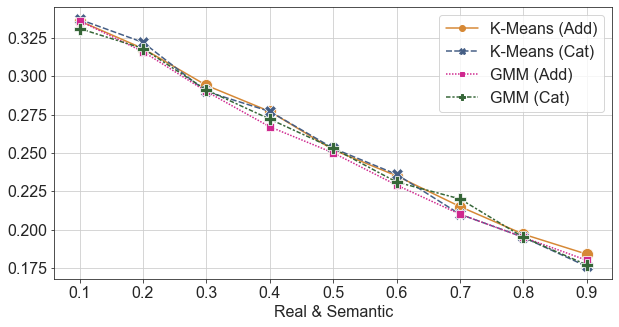

In [418]:
# real & semantic
df_ari_23_x[4:13]
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[4:13], palette=colors, markers=True, markersize=12)
plt.xlabel('Real & Semantic')

Text(0.5, 0, 'Rico & Real')

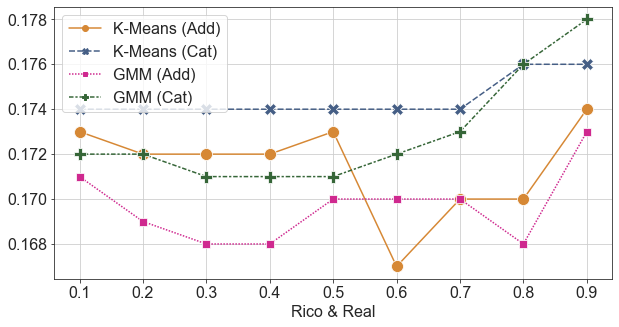

In [419]:
# rico & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[13:22], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Real')

Text(0.5, 0, 'Rico & Semantic')

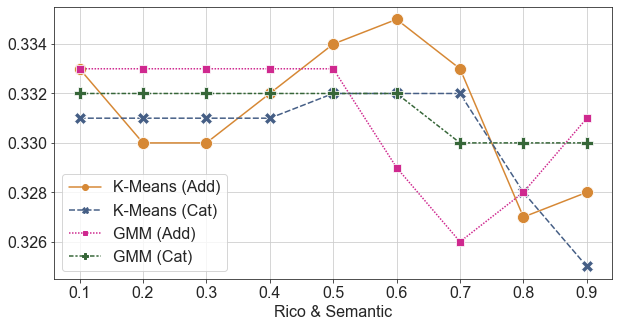

In [420]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')

Text(0.5, 0, 'Rico & seq2seq')

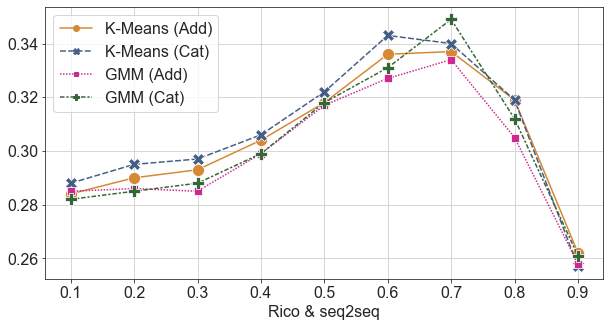

In [421]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')

Text(0.5, 0, 'seq2seq & Real')

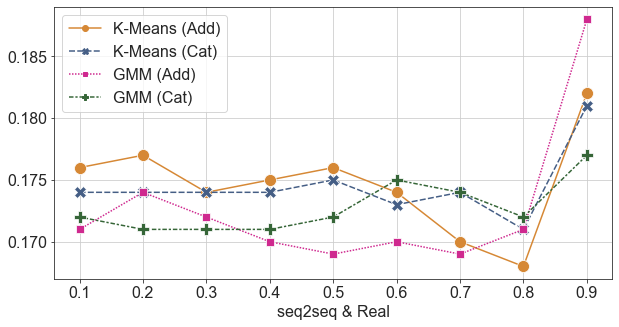

In [422]:
# seq2seq & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[40:49], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Real')

Text(0.5, 0, 'seq2seq & Semantic')

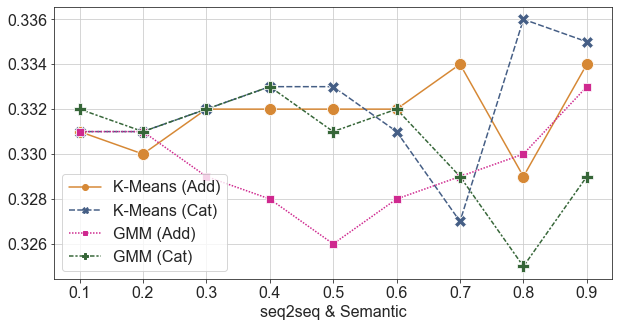

In [416]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')

In [423]:
df_nmi_23_x = df_nmi_23.copy()
df_nmi_23_x['label'] = labels_x
df_nmi_23_x.set_index('label', inplace=True)
df_nmi_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.466,0.466,0.460,0.460
Semantic,0.598,0.598,0.595,0.595
Rico,0.520,0.520,0.519,0.519
seq2seq,0.544,0.544,0.536,0.536
0.1,0.600,0.604,0.598,0.599


Text(0.5, 0, 'Rico & Semantic')

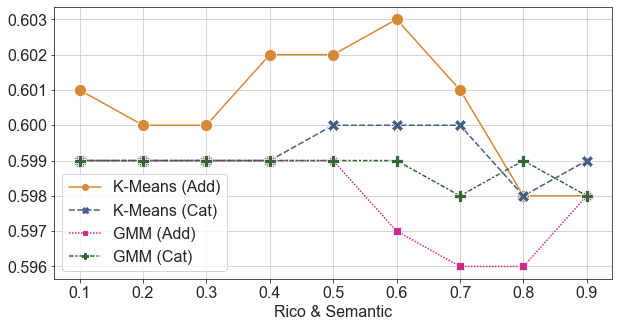

In [424]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')

Text(0.5, 0, 'Rico & seq2seq')

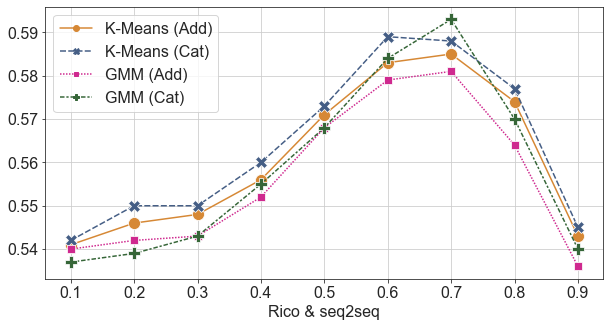

In [425]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')

Text(0.5, 0, 'seq2seq & Semantic')

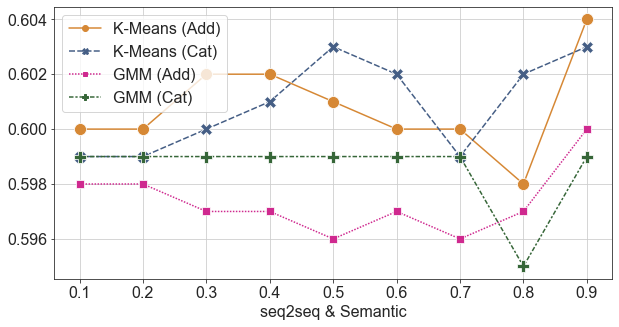

In [426]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')